# Exploration de la fonction mesureThermicite

Ce notebook permet de tester et d'explorer la fonction principale du projet.

In [10]:
# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [12]:
# Import de la fonction depuis main.py
from main import mesureThermicite

## Exemple d'utilisation avec un fichier réel

In [11]:
# Remplacez par le nom de votre fichier CSV
resultat = mesureThermicite("fichierSpectrometre.csv")
print("Résultat:", resultat)

Aire au-dessus de la courbe : 43712.49
Ratio aire/aire totale : 0.6623
Résultat: (np.float64(43712.490000000005), np.float64(0.6623104545454547))


## Exemple avec des données simulées

In [6]:
# Création d'un DataFrame d'exemple
df_exemple = pd.DataFrame({
    "nombre d'onde": np.linspace(770, 1430, 10),
    "transmission": np.random.uniform(80, 100, 10)
})

# Affichage tabulaire
df_exemple.head()

,nombre d'onde,transmission
0,770.000000,88.364503
1,843.333333,88.225855
2,916.666667,83.683034
3,990.000000,82.012132
4,1063.333333,84.469571


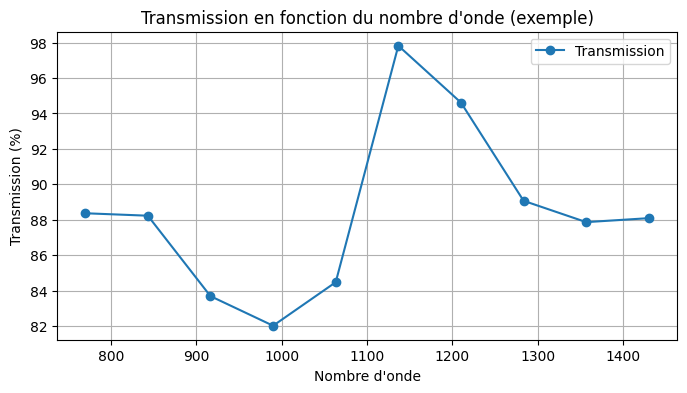

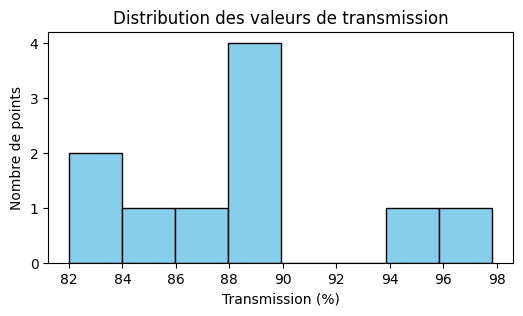

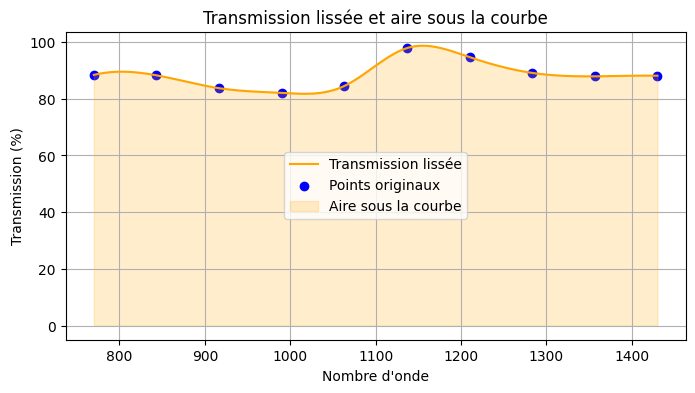

In [13]:
# Visualisation graphique
plt.figure(figsize=(8,4))
plt.plot(df_exemple["nombre d'onde"], df_exemple["transmission"], marker='o', label="Transmission")
plt.title("Transmission en fonction du nombre d'onde (exemple)")
plt.xlabel("Nombre d'onde")
plt.ylabel("Transmission (%)")
plt.grid(True)
plt.legend()
plt.show()

# Histogramme de la transmission
plt.figure(figsize=(6,3))
plt.hist(df_exemple["transmission"], bins=8, color='skyblue', edgecolor='black')
plt.title("Distribution des valeurs de transmission")
plt.xlabel("Transmission (%)")
plt.ylabel("Nombre de points")
plt.show()

# Courbe lissée (interpolation)
x = df_exemple["nombre d'onde"]
y = df_exemple["transmission"]
xnew = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(xnew)
plt.figure(figsize=(8,4))
plt.plot(xnew, y_smooth, label="Transmission lissée", color='orange')
plt.scatter(x, y, color='blue', label="Points originaux")
plt.fill_between(xnew, y_smooth, alpha=0.2, color='orange', label="Aire sous la courbe")
plt.title("Transmission lissée et aire sous la courbe")
plt.xlabel("Nombre d'onde")
plt.ylabel("Transmission (%)")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Sauvegarde dans un fichier temporaire
df_exemple.to_csv("exemple.csv", sep=";", index=False, header=False)

# Test de la fonction
mesureThermicite("exemple.csv")

Aire au-dessus de la courbe : 117897.45
Ratio aire/aire totale : 1.7863


(np.float64(117897.45351657923), np.float64(1.7863250532815036))